# Support Vector Machine

In [1]:
from sklearn.svm import LinearSVC, SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
iris = datasets.load_iris()
features = iris.data
target = iris.target
scaler = StandardScaler()

## Training a Linear Model

### train the model

In [6]:
temp_features = features[:100,:2]
temp_target = target[:100]
temp_features_standard = scaler.fit_transform(temp_features)
svc = LinearSVC(C=1.0)
model = svc.fit(temp_features_standard, temp_target)

### visualize the result

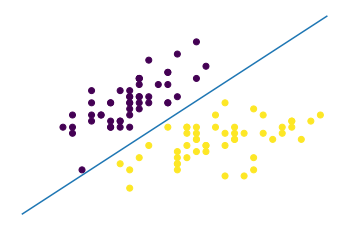

In [7]:
plt.scatter(temp_features_standard[:,0], temp_features_standard[:,1], c=temp_target)
w = svc.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-2.5, 2.5)
yy = a*xx - (svc.intercept_[0])/w[1]
plt.plot(xx,yy)
plt.axis("off")
plt.show()

### make prediction

In [8]:
new_observation = [[-2,3]]
svc.predict(new_observation)

array([0])

## Handling Linearly Inseparable Classes Using Kernels

### Create model

In [10]:
np.random.seed(0)
temp_features = np.random.randn(200, 2)
target_xor = np.logical_xor(temp_features[:,0]>0, temp_features[:,1]>0)
target_xor = np.where(target_xor, 0, 1)
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
model = svc.fit(temp_features, target_xor)

### visualize result

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


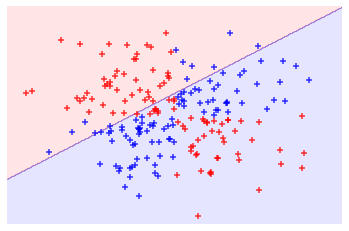

In [12]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1 ,xx2 = np.meshgrid(np.arange(-3,3,0.02), np.arange(-3,3,0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker='+', label=cl)
    

svc_linear = SVC(kernel="linear", random_state=0, C=1)
svc_linear.fit(temp_features, target_xor)
plot_decision_regions(temp_features, target_xor, svc_linear)
plt.axis("off")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


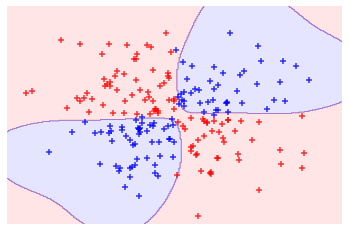

In [14]:
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
svc.fit(temp_features, target_xor)
plot_decision_regions(temp_features, target_xor, svc)
plt.axis("off")
plt.show()

## Creating Predicted Probabilities

In [15]:
features_standrize = scaler.fit_transform(features)
svc = SVC(kernel='linear', probability=True, random_state=0)
model = svc.fit(features_standrize, target)
new_observation = [[.4]*4]
model.predict_proba(new_observation)

array([[0.00582525, 0.96725691, 0.02691783]])

## Identifying Support Vectors

In [16]:
model.support_vectors_

array([[-0.90068117,  0.55861082, -1.16971425, -0.92054774],
       [-1.62768839, -1.74335684, -1.39706395, -1.18381211],
       [ 1.2803405 ,  0.09821729,  0.64908342,  0.3957741 ],
       [ 0.79566902, -0.59237301,  0.47857113,  0.3957741 ],
       [ 0.55333328,  0.55861082,  0.53540856,  0.52740629],
       [-1.14301691, -1.51316008, -0.26031542, -0.26238682],
       [-0.29484182, -0.13197948,  0.42173371,  0.3957741 ],
       [ 0.4321654 , -1.97355361,  0.42173371,  0.3957741 ],
       [ 0.06866179,  0.32841405,  0.59224599,  0.79067065],
       [ 0.55333328, -1.28296331,  0.64908342,  0.3957741 ],
       [ 1.15917263, -0.59237301,  0.59224599,  0.26414192],
       [ 1.03800476, -0.13197948,  0.70592084,  0.65903847],
       [ 0.18982966, -0.36217625,  0.42173371,  0.3957741 ],
       [ 0.18982966, -0.82256978,  0.76275827,  0.52740629],
       [-0.53717756, -0.13197948,  0.42173371,  0.3957741 ],
       [ 0.55333328, -1.74335684,  0.36489628,  0.13250973],
       [-0.90068117, -1.

In [17]:
model.support_

array([ 23,  41,  52,  54,  56,  57,  66,  68,  70,  72,  76,  77,  78,
        83,  84,  87,  98, 106, 110, 119, 123, 126, 127, 129, 133, 134,
       137, 138, 149])

In [18]:
model.n_support_

array([ 2, 15, 12])

## Handling Imbalanced Classes

In [19]:
imbalanced_features = features[40:100,:]
imbalanced_target = target[40:100]
imbalanced_target = np.where((imbalanced_target == 0), 0, 1)
imbalanced_features_standard = scaler.fit_transform(imbalanced_features)
svc = SVC(kernel='linear', class_weight="balanced", C=1.0, random_state=0)
model = svc.fit(imbalanced_features_standard, imbalanced_target)